In [69]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import affine_transform, uniform_filter

In [5]:
yes = [
    nib.load("../../Data/Temp/Pre-processed/100_sub-ADNI007S6120_ses-M000_T1w_brain.nii.gz").get_fdata(),
    nib.load("../../Data/Temp/Pre-processed/462_sub-ADNI037S6993_ses-M000_T1w_brain.nii.gz").get_fdata()
]
no = [
    nib.load("../../Data/Temp/Pre-processed/501_sub-ADNI067S0056_ses-M144_T1w_brain.nii.gz").get_fdata(),
    nib.load("../../Data/Temp/Pre-processed/510_sub-ADNI067S6442_ses-M000_T1w_brain.nii.gz").get_fdata()
]

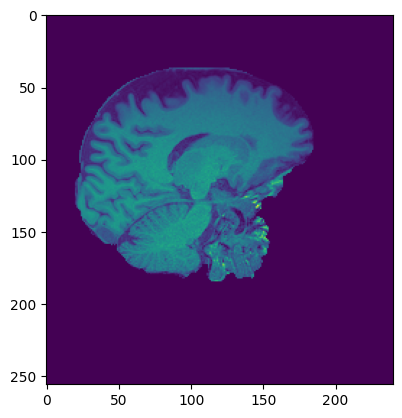

In [82]:
def imdisp(im, vmax=None):
    plt.imshow(im[120,:,::-1].T, vmax=vmax)

imdisp(yes[0])

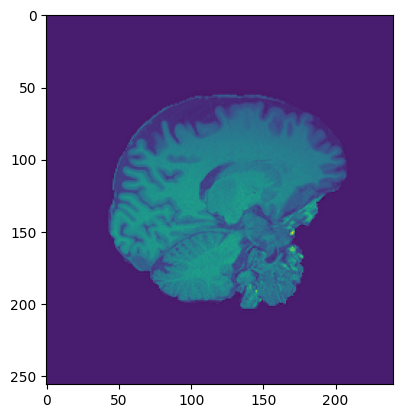

In [91]:
def remove_spatial_offset(im):
    i = np.arange(im.shape[0])
    j = np.arange(im.shape[1])
    k = np.arange(im.shape[2])
    im_pow = im**0.1
    total_sum = np.sum(im_pow)
    mean_i = np.sum(i[:, None, None] * im_pow) / total_sum
    mean_j = np.sum(j[None, :, None] * im_pow) / total_sum
    mean_k = np.sum(k[None, None, :] * im_pow) / total_sum
    offset = [
        mean_i - im.shape[0] / 2,
        mean_j - im.shape[1] / 2,
        mean_k - im.shape[2] / 2
    ]
    return affine_transform(im, matrix=np.eye(3), offset=offset)

im = remove_spatial_offset(yes[0])
imdisp(im)

565691.4102727444


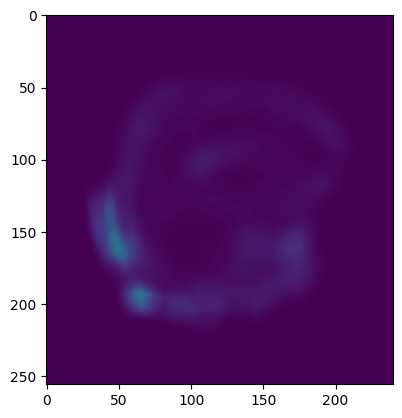

In [95]:
def spatial_err(im1, im2, blur=20):
    # Punish bigger areas with high mse by applying uniform filter
    err = abs(im1 - im2)
    err_blurred = uniform_filter(err, size=blur)
    return err_blurred**2

im1 = remove_spatial_offset(no[0])
im2 = remove_spatial_offset(no[1])
err = spatial_err(im1,im2)
imdisp(err,vmax=800_000)
print(np.max(err))

116345.45718595794


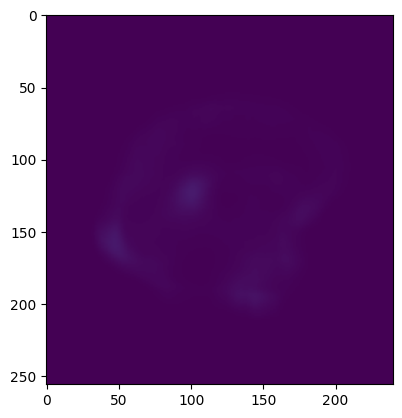

In [93]:
im1 = remove_spatial_offset(yes[0])
im2 = remove_spatial_offset(yes[1])
err = spatial_err(im1,im2)
imdisp(err,vmax=800_000)
print(np.max(err))